In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
my_colors = [u'#1f77b4',
 u'#ff7f0e',
 u'#2ca02c',
 u'#d62728',
 u'#9467bd',
 u'#8c564b',
 u'#e377c2',
 u'#7f7f7f',
 u'#bcbd22',
 u'#17becf',            
 u'#fffa00',
 u'#000000',
 u'#b6ff9b',
 u'#005400',
 u'#ffc28c',
 u'#d69c68',
 u'#c1c1c1',
 u'#fbccff',
 u'#ff5e5e',
 u'#00edb2',
 u'#ffca1e',
 u'#933f3f',
 u'#f2f2f2']
col_known = ["#1 Mock community (direct amplification)",
    "#2 Mock community diluted (direct amplification)",
    "#4 Mock community (nested amplification)",
    "#5 Mock community diluted (nested amplification)",
    "#6 Field sample Grassl Rep 1 (Direct triplicate)",
    "#7 Field sample Grassl Rep 1 (Nested triplicate)",
    "#8  Field sample Grassl Rep 1 (Nested single)",
    "#9 Field sample 297155 Rep 2 (Direct triplicate)",
    "#10  Field sample 297155 Rep 2 (Nested triplicate)",
    "#11  Field sample 297155 Rep 3 (Direct triplicate)",
    "#12  Field sample 297155 Rep 3 (Nested triplicate)",
    "#13  Field sample 297155 Rep 3 (Nested single)"]
%matplotlib inline
pd.read_csv("usearch_OTU_id93_count.txt",sep="\t",index_col=0).sum()

Test4-AMFmix-2018_1     1508.0
Test4-AMFmix-2018_2     1351.0
Test4-AMFmix-2018_4      668.0
Test4-AMFmix-2018_5     1580.0
Test4-AMFmix-2018_6     1135.0
Test4-AMFmix-2018_7      824.0
Test4-AMFmix-2018_8      636.0
Test4-AMFmix-2018_9     1238.0
Test4-AMFmix-2018_10    1267.0
Test4-AMFmix-2018_11     690.0
Test4-AMFmix-2018_12     632.0
Test4-AMFmix-2018_13     734.0
dtype: float64

Text(0.5,1,'Reads > 5 passes and clustering using usearch and 93%')

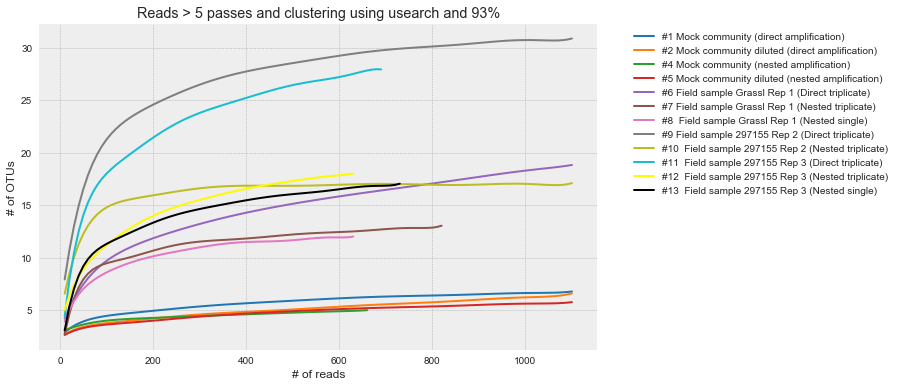

In [216]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
plt.style.use('bmh')

df = pd.read_csv("93_alpha_collated/observed_species.txt",sep="\t",index_col=0)
df = df.replace("n/a",np.nan)
df.columns = list(df.columns[:2]) + col_known
sample_id = df.columns[2:]

plt.figure(figsize=(10,6))
for i in np.arange(len(sample_id)):#each_sample = sample_id[2]
    each_sample = sample_id[i]
    dft = df.loc[:,["sequences per sample",each_sample]]
    dft = dft[dft.notnull().all(1)]
    dft = dft.astype("float")
    dftt = pd.DataFrame(dft.groupby("sequences per sample")[each_sample].mean()).reset_index()
    #dftt
    #plt.plot(dftt["sequences per sample"],dftt[each_sample],".",label=each_sample)
    #plt.legend()


    model = Pipeline([('poly', PolynomialFeatures(degree=9)),('Ridge', Ridge(fit_intercept=False,alpha=100))])
    grid_values = {'Ridge__alpha': [0.001,0.01,0.05,0.1,1,10,100]}
    grid_clf_model = GridSearchCV(model,grid_values,cv=5)
    #model.fit(list(dftt["sequences per sample"]),list(dftt[each_sample]))
    X = np.array(dftt["sequences per sample"]).reshape(-1,1)
    y = np.array(dftt[each_sample]).reshape(-1,1)
    y_pred = grid_clf_model.fit(X,y).predict(X).reshape(-1,1)
    
    
    plt.plot(X,y_pred,"-",label=each_sample,color=my_colors[i])
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2)
plt.ylabel("# of OTUs")
plt.xlabel("# of reads")
plt.title("Reads > 5 passes and clustering using usearch and 93%")


